In [ ]:
import numpy as np
import pandas as pd
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.utils import shuffle
import string
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
 
 
#Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

In [ ]:
#sql package for data wrangling
!pip install -U pandasql
from pandasql import sqldf
#going to use python sqldf package for some of this querying so lets just assign the function
pysqldf = lambda q: sqldf(q,globals())
 
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
 
#Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
 
# Set default font size
plt.rcParams['font.size'] = 24
 
#Data balancing
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
 
#Modeling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=16edca1b2fc596b6a1485772a9f677e24c9950ec32ee36863743d6d314e5fa79
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df.head()

Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
0           0          767   33  ...       Initmates        Intimate   Intimates
1           1         1080   34  ...         General         Dresses     Dresses
2           2         1077   60  ...         General         Dresses     Dresses
3           3         1049   50  ...  General Petite         Bottoms       Pants
4           4          847   47  ...         General            Tops     Blouses

[5 rows x 11 columns]

In [ ]:
df.tail()

Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
23481       23481         1104   34  ...  General Petite         Dresses     Dresses
23482       23482          862   48  ...  General Petite            Tops       Knits
23483       23483         1104   31  ...  General Petite         Dresses     Dresses
23484       23484         1084   28  ...         General         Dresses     Dresses
23485       23485         1104   52  ...  General Petite         Dresses     Dresses

[5 rows x 11 columns]

In [ ]:
df.describe()

Unnamed: 0   Clothing ID  ...  Recommended IND  Positive Feedback Count
count  23486.000000  23486.000000  ...     23486.000000             23486.000000
mean   11742.500000    918.118709  ...         0.822362                 2.535936
std     6779.968547    203.298980  ...         0.382216                 5.702202
min        0.000000      0.000000  ...         0.000000                 0.000000
25%     5871.250000    861.000000  ...         1.000000                 0.000000
50%    11742.500000    936.000000  ...         1.000000                 1.000000
75%    17613.750000   1078.000000  ...         1.000000                 3.000000
max    23485.000000   1205.000000  ...         1.000000               122.000000

[8 rows x 6 columns]

In [ ]:
df.shape

(23486, 11)

In [ ]:
#cleaning data
#check for null values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.drop(labels=['Title', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

Clothing ID  Age  ... Department Name  Class Name
0          767   33  ...        Intimate   Intimates
1         1080   34  ...         Dresses     Dresses
2         1077   60  ...         Dresses     Dresses
3         1049   50  ...         Bottoms       Pants
4          847   47  ...            Tops     Blouses

[5 rows x 9 columns]

In [ ]:
#Drop the rows with null values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Review Text              22628 non-null  object
 3   Rating                   22628 non-null  int64 
 4   Recommended IND          22628 non-null  int64 
 5   Positive Feedback Count  22628 non-null  int64 
 6   Division Name            22628 non-null  object
 7   Department Name          22628 non-null  object
 8   Class Name               22628 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [ ]:
# improt nltk library for cleaning the text
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('all')
nltk.download('punkt')
# for stopwords removal
from nltk.corpus import stopwords
#for word tokenizing
from nltk import word_tokenize
#for stemming
from nltk.stem import PorterStemmer
#for making wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data]    |   Unzipping stemmers/porter_test.zip.
[nltk_data]    | Downloading package wmt15_eval to /root/nltk_data...
[nltk_data]    |   Unzipping models/wmt15_eval.zip.
[nltk_data]    | Downloading package mwa_ppdb to /root/nltk_data...
[nltk_data]    |   Unzipping misc/mwa_ppdb.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def clean_text(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
# Remove special characters
    text = text.apply(lambda x: "".join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))
# Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
            
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    # Convert to string
    text = text.astype(str)
    
    return text
# Applying clean_text function to data
df['Filtered Review Text'] = clean_text(df['Review Text'])
df['Filtered Review Text'].head(2)

0    absolutely wonderful  silky and sexy and comfo...
1    love this dress its sooo pretty i happened to ...
Name: Filtered Review Text, dtype: object

In [ ]:
# Removing stop words
stop = stopwords.words('english')
df['Filtered Review Text'] = df['Filtered Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Filtered Review Text'][:2]


0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
Name: Filtered Review Text, dtype: object

In [ ]:
# library for Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
# Sentiment Analysis
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])
# Converting 0 to 1 Decimal Score to a Positive, Negative, Neutral Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'
df[['Polarity Score', 'Neutral Score', 'Negative Score', 'Positive Score', 'Sentiment']][:3]

Polarity Score  Neutral Score  Negative Score  Positive Score Sentiment
0          0.8932          0.272           0.000           0.728  Positive
1          0.9729          0.664           0.000           0.336  Positive
2          0.9427          0.792           0.027           0.181  Positive

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
#Drop the rows with null values
df=df.dropna()

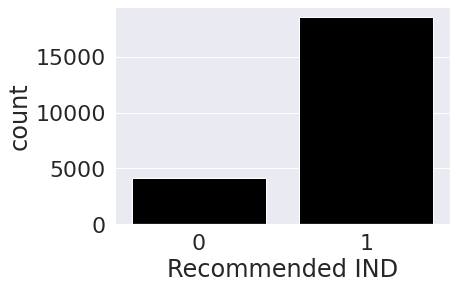

In [ ]:
#Lets see how imbalanced the target is
sns.set_style('darkgrid')
sns.countplot(data = df
             ,x='Recommended IND'
             ,color='black'
             )

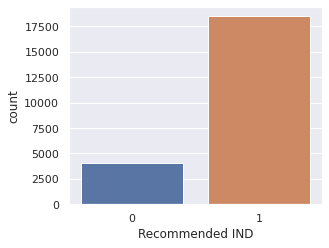

In [ ]:
#Lets see how imbalanced the target is
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Recommended IND', data=df)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=360)
plt.show()

In [ ]:
#We'll create a new categorial variable called Age group based on the quartiles
age_grouping = pysqldf("""select *,
(case when [Age] between 18 and 34 then '18 to 34'
    when [Age] between 35 and 41 then '35 to 41'
    when [Age] between 42 and 52 then '42 to 52'
    else '53 or older' end) as AgeGroup
    from df""")

df = pd.DataFrame(age_grouping)


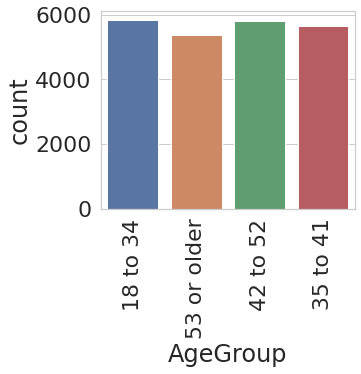

In [ ]:
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='AgeGroup', data=df)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)
plt.show()

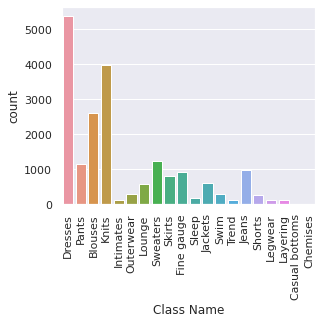

In [ ]:
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Class Name', data=df)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)
plt.show()

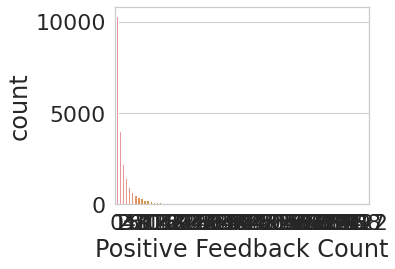

In [ ]:
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Positive Feedback Count', data=df)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=360)
plt.show()

In [ ]:
#make sure the tagging worked and see what the tag rate is
query_target = pysqldf("""select [Recommended IND], count([Recommended IND]) from df group by [Recommended IND]""")
df_target = pd.DataFrame(query_target, columns=['Recommended IND', 'count([Recommended IND])'])
print(df_target)
rec=float(df_target['count([Recommended IND])'][df_target['Recommended IND']==1])
nrec=float(df_target['count([Recommended IND])'][df_target['Recommended IND']==0])
print(str(round((rec/(nrec + rec))*100,2))+'%'+' '+'of transactions were recommended') 

   Recommended IND  count([Recommended IND])
0                0                      4101
1                1                     18527
81.88% of transactions were recommended


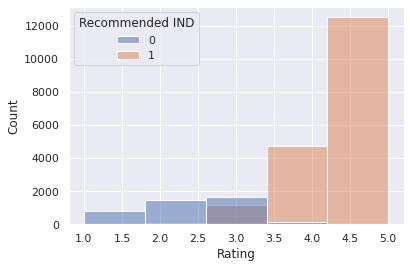

In [ ]:
#Lets see what the distribution of reviews are by rating
sns.set(style="darkgrid")
sns.histplot(data = df,x = 'Rating',color = 'navy',bins=5,hue='Recommended IND')
plt.show()

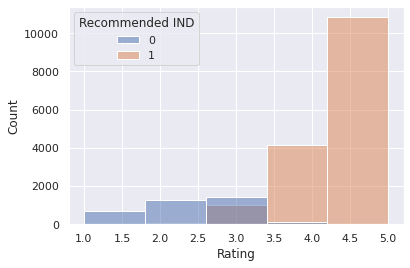

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data = df,x = 'Rating',color = 'navy',bins=5,hue='Recommended IND')
plt.show()

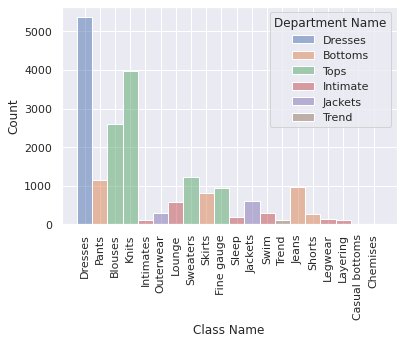

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data = df,x = 'Class Name',color = 'navy',bins=5,hue='Department Name')
plt.xticks(rotation=90)
plt.show()

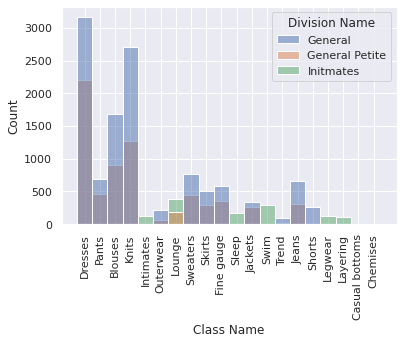

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data = df,x = 'Class Name',color = 'navy',bins=5,hue='Division Name')
plt.xticks(rotation=90)
plt.show()

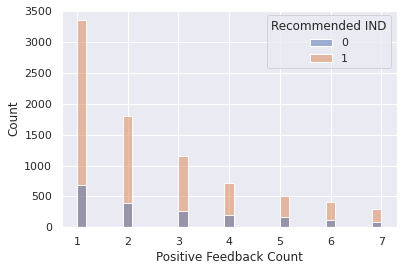

In [ ]:
#Lets see what the distribution of reviews are by rating
sns.set(style="darkgrid")
sns.histplot(data = df,x = 'Positive Feedback Count',color = 'navy',hue='Recommended IND',binrange=(1,7))
plt.show()


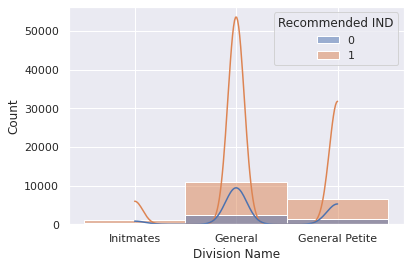

In [ ]:
#Lets see what the distribution of reviews are in the different categories
sns.set(style="darkgrid")
sns.histplot(data = df,x = 'Division Name',color = 'navy',kde = True,bins = 10,hue='Recommended IND')
plt.show()

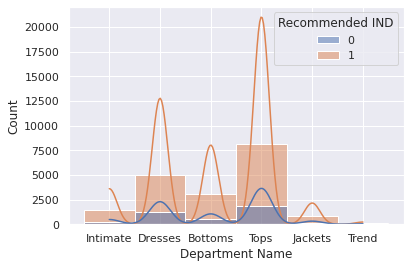

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data=df,x='Department Name',color='navy',kde=True,bins=10,hue='Recommended IND')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


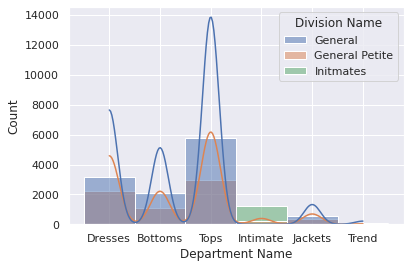

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data=df,x='Department Name',color='navy',kde=True,bins=10,hue='Division Name')
plt.show()

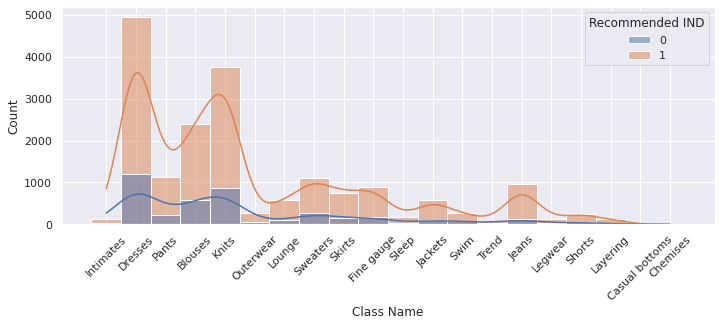

In [ ]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 4)

sns.histplot(data = df
            ,x = 'Class Name'
            ,color = 'navy'
            ,kde = True
            ,bins = 10
            ,ax=ax
            ,hue='Recommended IND'
            )

plt.xticks(rotation=45)
plt.show()

In [ ]:
import tensorflow as tf
tf.__version__ # newest version

'2.5.0'

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


In [ ]:
df.head()

Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
2           2         1077   60  ...         General         Dresses     Dresses
3           3         1049   50  ...  General Petite         Bottoms       Pants
4           4          847   47  ...         General            Tops     Blouses
5           5         1080   49  ...         General         Dresses     Dresses
6           6          858   39  ...  General Petite            Tops       Knits

[5 rows x 11 columns]

In [ ]:
# concatenate
#df['Reviews'] = df['Title'] + ' ' + df['Review Text'] + ' ' + df['Division Name'] + ' ' + df['Department Name'] + ' ' + df['Class Name']
# remove the title review text, division name, department name and class name columns
df = df[['Review Text', 'Recommended IND']]
df.head()

Review Text  Recommended IND
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1
5  I love tracy reese dresses, but this one is no...                0
6  I aded this in my basket at hte last mintue to...                1

In [ ]:
# shuffle the data frame
df = shuffle(df, random_state=2021)
df.head()

Review Text  Recommended IND
9281   I was surprised retailer decided to ship this ...                0
16192  Can't wait to wear this top!! i found it to ru...                1
16696  I tried these on in my local store and immedia...                1
20893  This ran a bit small; i'm normally a 2, this w...                0
6200   I ordered the top from a store to have it ship...                0

In [ ]:
# remove punctuation
df["Reviews"] = df['Review Text'].str.replace('[{}]'.format(string.punctuation), '')

# lower-case everything
df['Reviews'] = df['Reviews'].str.lower()

In [ ]:
# get the entire dataset's unique words and its frequency
total_words = df['Reviews'].str.split()

total_words.head()

14846    [this, top, is, lovely, i, wanted, so, badly, ...
20050    [bought, my, 3rd, pair, of, pilcro, cords, in,...
14625    [so, cute, modest, length, perfect, with, a, f...
5098     [this, is, an, attractive, fitted, vest, the, ...
521      [good, quality, material, i, got, size, 10, wh...
Name: Reviews, dtype: object

In [ ]:
total_word_set = set()
total_words.apply(total_word_set.update)

14846    None
20050    None
14625    None
5098     None
521      None
         ... 
23342    None
21084    None
2760     None
18195    None
6428     None
Name: Reviews, Length: 22628, dtype: object

In [ ]:
# word frequency distribution
from collections import Counter

count_dict = Counter(total_word_set)
VOCAB_SIZE = len(count_dict)

In [ ]:
# vectorize text
# sequence_length = 100

encoder = TextVectorization(max_tokens = VOCAB_SIZE)

In [ ]:
#convert the df to tf dataset
dataset = tf.data.Dataset.from_tensor_slices(
           ( tf.cast(df['Reviews'].values, tf.string),
            tf.cast(df['Recommended IND'].values, tf.int32)))

In [ ]:
dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [ ]:
# print out an instance in the dataset
for example, label in dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'this top is lovely i wanted so badly to make it work for me but it is just too short and makes me look broad i am 5 11 and have a long torso and the keyhole where the tie is gapes fixed that with two safety pins though  and would have stitched it shut if i was keeping this lovely blouse\r\n\r\nthe fact that i cannot lift my arms up without flashing my tummy to the world didnt even deter me enough to return it\r\n\r\nbut the overall fit was just boxy on me it made me look larger overall fo'
label:  1


In [ ]:
#data split for train and test 
TRAIN_SIZE = int(len(dataset)*0.7)

train_dataset = dataset.take(TRAIN_SIZE)
test_dataset = dataset.skip(TRAIN_SIZE) 

In [ ]:
# print out a training example and a test example

print('========== TRAINING EXAMPLE','='*50)
for sentence, label in train_dataset.take(2):
    print('text: ', sentence.numpy())
    print('label: ', label.numpy())
print()    
print('========== TEST EXAMPLE', '='*54)
for sentence, label in test_dataset.take(2):
    print('text: ', sentence.numpy())
    print('label: ', label.numpy())

========== TRAINING EXAMPLE ==================================================
text:  b'this top is lovely i wanted so badly to make it work for me but it is just too short and makes me look broad i am 5 11 and have a long torso and the keyhole where the tie is gapes fixed that with two safety pins though  and would have stitched it shut if i was keeping this lovely blouse\r\n\r\nthe fact that i cannot lift my arms up without flashing my tummy to the world didnt even deter me enough to return it\r\n\r\nbut the overall fit was just boxy on me it made me look larger overall fo'
label:  1
text:  b'bought my 3rd pair of pilcro cords in the dark turquoise the other 2 are from previous seasons love these pants for fall because they are extremely comfortable and stylish the dark turquoise was paired with the poppy tunic in blue at my local store i liked the pairing and ended up buying both i find these to fit true to size vs other items at retailer that fit larger i am a 29 8 while in most ot

In [ ]:
# tuning the tring and test dataset

    # previous buffer_size hyperparameter BUFFER_SIZE = 10000

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16

train_dataset = train_dataset.cache().batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

In [ ]:
#since we set the batch_size=16, when we take out 1, which means 1 batch (16 obs/rows)
# features, labels
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'this top is lovely i wanted so badly to make it work for me but it is just too short and makes me look broad i am 5 11 and have a long torso and the keyhole where the tie is gapes fixed that with two safety pins though  and would have stitched it shut if i was keeping this lovely blouse\r\n\r\nthe fact that i cannot lift my arms up without flashing my tummy to the world didnt even deter me enough to return it\r\n\r\nbut the overall fit was just boxy on me it made me look larger overall fo'
 b'bought my 3rd pair of pilcro cords in the dark turquoise the other 2 are from previous seasons love these pants for fall because they are extremely comfortable and stylish the dark turquoise was paired with the poppy tunic in blue at my local store i liked the pairing and ended up buying both i find these to fit true to size vs other items at retailer that fit larger i am a 29 8 while in most other pants at retailer i am a 6 i am 57 and 135 lbs'
 b'so cute modest length perfect with a f

Create text encoder 

In [ ]:
#create the text encoder.The raw text needs to be processed before it can be used in the model. I use the experimental.preprocessing.TextVectorization layer.
import tensorflow as tf

VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
# We only need to convert features (NOT label) to int
encoder.adapt(train_dataset.map(lambda text, label: text))


In [ ]:
# the first 20 tokens
np.array(encoder.get_vocabulary())[:20]

array(['', '[UNK]', 'the', 'i', 'and', 'a', 'it', 'is', 'this', 'to',
       'in', 'but', 'on', 'for', 'of', 'with', 'was', 'so', 'my', 'dress'],
      dtype='<U13')

In [ ]:
#create embedding layer
embedding_layer = tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
                                            output_dim=64,
                                            mask_zero=True)


Build a model of RNN using a bidirectional LSTM to forecast the Recommended IND based on Reviews

In [ ]:
model1 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model1.layers])

[False, True, True, True, True]


In [ ]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', patience=3)

train model

In [ ]:
history1 = model1.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30,
                    callbacks = [early_stop])

Epoch 1/10
990/990 [==============================] - 118s 109ms/step - loss: 0.4995 - accuracy: 0.6388 - val_loss: 0.3005 - val_accuracy: 0.8583
Epoch 2/10
990/990 [==============================] - 106s 107ms/step - loss: 0.2628 - accuracy: 0.8785 - val_loss: 0.2835 - val_accuracy: 0.8750
Epoch 3/10
990/990 [==============================] - 107s 108ms/step - loss: 0.2342 - accuracy: 0.8938 - val_loss: 0.2850 - val_accuracy: 0.8750
Epoch 4/10
990/990 [==============================] - 106s 107ms/step - loss: 0.2225 - accuracy: 0.9008 - val_loss: 0.2888 - val_accuracy: 0.8833
Epoch 5/10
990/990 [==============================] - 106s 107ms/step - loss: 0.2155 - accuracy: 0.9058 - val_loss: 0.2917 - val_accuracy: 0.8771
Epoch 6/10
990/990 [==============================] - 106s 107ms/step - loss: 0.2105 - accuracy: 0.9093 - val_loss: 0.2935 - val_accuracy: 0.8771
Epoch 7/10
990/990 [==============================] - 106s 107ms/step - loss: 0.2062 - accuracy: 0.9132 - val_loss: 0.2950 -

In [ ]:
test_loss2, test_acc2 = model1.evaluate(test_dataset)

print(f'Test Loss: {round(test_loss2,2)}')
print(f'Test Accuracy: {round(test_acc2,4)*100}%')

425/425 [==============================] - 9s 20ms/step - loss: 0.2691 - accuracy: 0.8856
Test Loss: 0.27
Test Accuracy: 88.56%


(0.0, 0.41054136529564855)

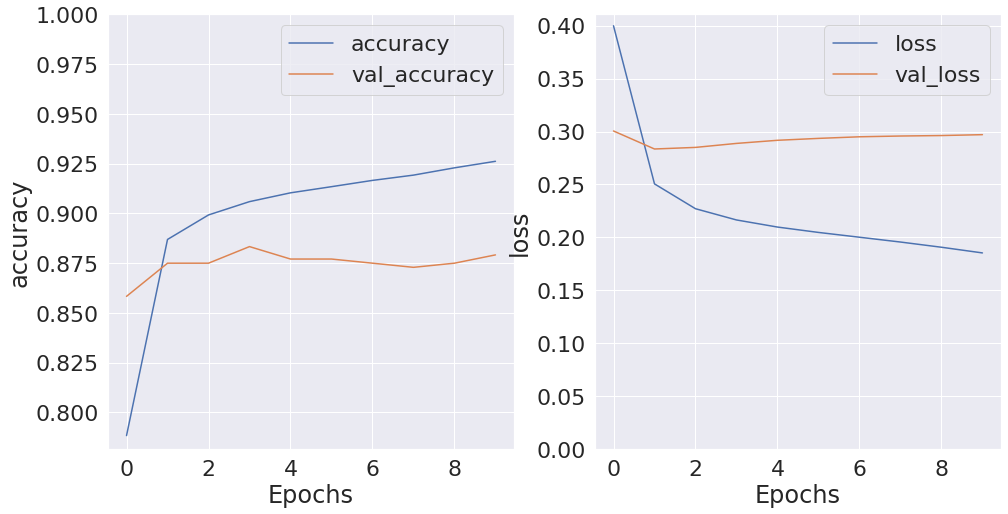

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

(0.0, 0.4106203928589821)

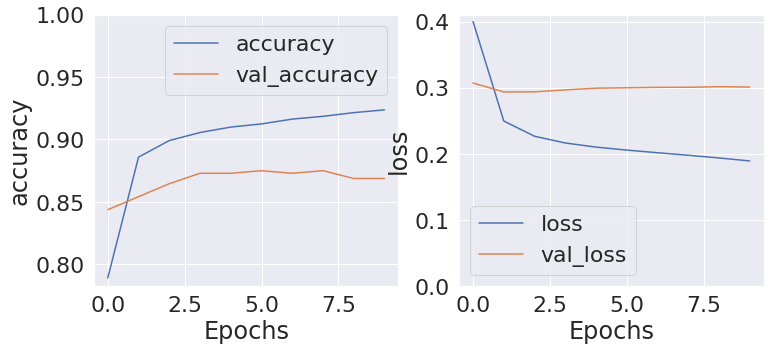

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_graphs(history1, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history1, 'loss')
plt.ylim(0,None)

To check the accuracy of the model ,run a test with some new reviews on model

In [ ]:
#if the prediction is >= 0.0, it is positive reveiw, otherwise, negative

def make_prediction(text):
    prediction = model1.predict(np.array([text]))
    if prediction >= 0.0:
        return 'a positive review.'
    else:
        return 'a negative review.'


# run a few validation predictions:
review_1 = ('The shirt is cool. The print on the shirt '
               'is so much fun. I would recommend this product.') #true label = 1, positive review

review_2 = ('The pattern is hedious, and the fit is weird. '
                 'I would not recommend this to anyone.') #true label = 0, negative review
 
review_3 = ('So happy! I order size M because I have my belly and it works perfect, ''the waist is wide helping to control.') # true label = 1, positive review

review_4 = ('True to size and comfy! The inner lining is soft and dry-fit while the outside is a bit more like a windbreaker material. '
                 'I like that they are super lightweight and not so thin that you can see your underwear') # true label = 1, positive review

text_list = [review_1, review_2, review_3, review_4]

counter = 0
for review in text_list:
    counter += 1
    print(f'Review {counter}: {make_prediction(review)}')
    print()
    
# model got every review correct. 

Review 1: a positive review.

Review 2: a negative review.

Review 3: a positive review.

Review 4: a positive review.



In [ ]:
def make_prediction(text):
    prediction = model1.predict(np.array([text]))
    if prediction >= 0.0:
        return 'a positive review.'
    else:
        return 'a negative review.'
review_n=('I would not recommend this to anyone.') 
text_list=[review_n]

counter = 0
for review in text_list:
    counter += 1
    print(f'Review {counter}: {make_prediction(review)}')
    print()

Review 1: a negative review.

